In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [2]:
# Leyendo el archivo
df = pd.read_csv('REPORCOL.csv',encoding='latin-1')
df

/home/rubendv/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,14,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,POLOZA,COBERTURA,RAMO,MODA,AO_POLIZA,SEXO,EDAD_CALC,NO_ASEG,PMAVALUAR,SA_PREVIA,...,TIEMPO,C_EXT,C_DIV,FP_POLIZA,PLAN,IGC,F_EMI,NOMBREPLAN,DESC_EDO,DIVISION
0,1500405100001,BASICA,150,606,5,M,62,1,3380.75,250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
1,1500405100001,BASICA,150,606,5,F,58,2,1778.25,250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
2,1500405100001,BASICA,150,606,5,M,59,3,2544.50,250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
3,1500405100001,BASICA,150,606,5,M,44,4,753.25,250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
4,1500405100001,BASICA,150,606,5,M,54,5,1632.25,250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391920,1600405100732,BASICA,160,601,2,M,41,35,302.52,120000,...,R,N,N,12,T,G,20041115,GRUPO CON UTILIDAD GLOBAL MN,YUCATAN,DIVISION SURESTE
391921,1600405100732,BIT-T,160,601,2,M,38,36,0.00,120000,...,R,N,N,12,T,G,20041115,GRUPO CON UTILIDAD GLOBAL MN,YUCATAN,DIVISION SURESTE
391922,1600405100732,BASICA,160,601,2,M,38,36,250.80,120000,...,R,N,N,12,T,G,20041115,GRUPO CON UTILIDAD GLOBAL MN,YUCATAN,DIVISION SURESTE
391923,1600405100732,BIT-T,160,601,2,M,24,37,0.00,120000,...,R,N,N,12,T,G,20041115,GRUPO CON UTILIDAD GLOBAL MN,YUCATAN,DIVISION SURESTE


In [3]:
# Borramos datos que no nos aportan la suficiente información
#df.drop(['_unit_id','birthplace', 'date_of_birth','birthplace_gold','date_of_birth_gold','race_ethnicity_gold','religion_gold','sexual_orientation_gold','sexual_orientation_gold','year_of_award_gold','birthplace:confidence','date_of_birth:confidence'], axis=1, inplace=True )
#df
df = df.loc[:,['COBERTURA', 'SEXO', 'ADMON', 'EXP', 'TIEMPO', 'C_EXT', 'C_DIV', 'PLAN', 'IGC', 'NOMBREPLAN', 'DESC_EDO', 'DIVISION']]
df

,COBERTURA,SEXO,ADMON,EXP,TIEMPO,C_EXT,C_DIV,PLAN,IGC,NOMBREPLAN,DESC_EDO,DIVISION
0,BASICA,M,N,S,R,N,N,T,C,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
1,BASICA,F,N,S,R,N,N,T,C,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
2,BASICA,M,N,S,R,N,N,T,C,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
3,BASICA,M,N,S,R,N,N,T,C,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
4,BASICA,M,N,S,R,N,N,T,C,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
...,...,...,...,...,...,...,...,...,...,...,...,...
391920,BASICA,M,N,G,R,N,N,T,G,GRUPO CON UTILIDAD GLOBAL MN,YUCATAN,DIVISION SURESTE
391921,BIT-T,M,N,G,R,N,N,T,G,GRUPO CON UTILIDAD GLOBAL MN,YUCATAN,DIVISION SURESTE
391922,BASICA,M,N,G,R,N,N,T,G,GRUPO CON UTILIDAD GLOBAL MN,YUCATAN,DIVISION SURESTE
391923,BIT-T,M,N,G,R,N,N,T,G,GRUPO CON UTILIDAD GLOBAL MN,YUCATAN,DIVISION SURESTE


In [4]:
#df['Designation'].unique()

In [5]:
dataset = df.values
dataset

array([['BASICA', 'M', 'N', ...,
        'SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES)', 'JALISCO',
        'DIVISION OCCIDENTE'],
       ['BASICA', 'F', 'N', ...,
        'SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES)', 'JALISCO',
        'DIVISION OCCIDENTE'],
       ['BASICA', 'M', 'N', ...,
        'SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES)', 'JALISCO',
        'DIVISION OCCIDENTE'],
       ...,
       ['BASICA', 'M', 'N', ..., 'GRUPO CON UTILIDAD GLOBAL MN',
        'YUCATAN', 'DIVISION SURESTE'],
       ['BIT-T', 'M', 'N', ..., 'GRUPO CON UTILIDAD GLOBAL MN',
        'YUCATAN', 'DIVISION SURESTE'],
       ['BASICA', 'M', 'N', ..., 'GRUPO CON UTILIDAD GLOBAL MN',
        'YUCATAN', 'DIVISION SURESTE']], dtype=object)

In [6]:
#dataset.astype(str)

In [7]:
X = dataset[:, :-1]
y = dataset[:,-1]

In [8]:
X = X.astype(str)

In [9]:
def load_dataset(filename):
    # Cargamos el Dataframe
    df = pd.read_csv(filename ,encoding='latin-1')
    df = pd.DataFrame(df)
    df = df.loc[:,['COBERTURA', 'SEXO', 'ADMON', 'EXP', 'TIEMPO', 'C_EXT', 'C_DIV', 'PLAN', 'IGC', 'NOMBREPLAN', 'DESC_EDO', 'DIVISION']]
    df = df.astype(str)
    # Generamos un arreglo
    dataset = df.values
    # Dividimos en X y y
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # Forzamos que X sea string 
    X = X.astype(str)
    return X, y

In [10]:
# Cargamos el dataset
X, y = load_dataset('REPORCOL.csv')

# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print('train', X_train)
print('test', X_test)

# Checamos las dimensiones
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

/home/rubendv/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (13,14,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


train [['BASICA' 'M' 'S' ... 'C' 'COLECTIVO DEUDORES' 'DISTRITO FEDERAL']
 ['BASICA' 'M' 'S' ... 'C' 'COLECTIVO SIN UTILIDAD MN' 'JALISCO']
 ['BASICA' 'M' 'N' ... 'G' 'GRUPO SIN UTILIDAD MN' 'JALISCO']
 ...
 ['BASICA' 'M' 'N' ... 'C' 'COLECTIVO CON UTILIDAD GLOBAL MN' 'CAMPECHE']
 ['BASICA' 'M' 'S' ... 'C' 'COLECTIVO DEUDORES' 'DISTRITO FEDERAL']
 ['BASICA' 'M' 'S' ... 'C' 'COLECTIVO SIN UTILIDAD MN' 'YUCATAN']]
test [['BASICA' 'M' 'S' ... 'C' 'COLECTIVO SIN UTILIDAD MN' 'JALISCO']
 ['BITP' 'F' 'A' ... 'G' 'GRUPO CON UTILIDAD GLOBAL MN'
  'DISTRITO FEDERAL']
 ['BASICA' 'F' 'N' ... 'C' 'COLECTIVO CON UTILIDAD GLOBAL MN' 'CAMPECHE']
 ...
 ['BASICA' 'M' 'S' ... 'C' 'COLECTIVO SIN UTILIDAD MN' 'YUCATAN']
 ['BASICA' 'F' 'A' ... 'G' 'GRUPO CON UTILIDAD GLOBAL MN' 'MORELOS']
 ['BASICA' 'M' 'S' ... 'C' 'COLECTIVO DEUDORES' 'DISTRITO FEDERAL']]
Train (262589, 11) (262589,)
Test (129336, 11) (129336,)


In [11]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [12]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [13]:
# Preparamos los datos de entrada o características
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# Preparamos los datos de salida o target
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [14]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [15]:
# Selección de características con chi-squared
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Característica 0: 21676.905095
Característica 1: 505.971518
Característica 2: 57769.740767
Característica 3: 32696.956804
Característica 4: 17674.074285
Característica 5: 3846.659027
Característica 6: 130.764482
Característica 7: nan
Característica 8: 30042.573239
Característica 9: 19305.917781
Característica 10: 510847.494656


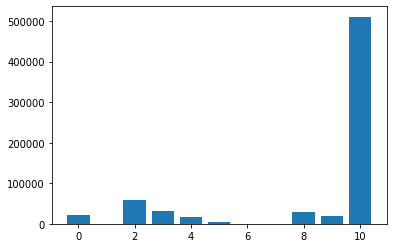

In [16]:
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [17]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [18]:
# Selección de características con mutual information
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Característica 0: 0.065571
Característica 1: 0.051001
Característica 2: 0.179264
Característica 3: 0.250666
Característica 4: 0.070959
Característica 5: 0.008031
Característica 6: 0.000925
Característica 7: 0.001974
Característica 8: 0.152704
Característica 9: 0.511079
Característica 10: 1.437675


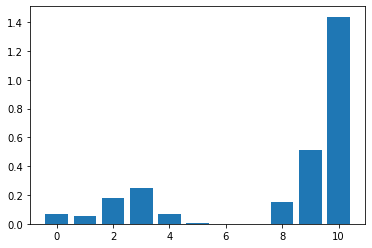

In [19]:
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()